In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ta  # technical analysis library

# Load the AAPL historical data
df_aapl = pd.read_csv("../data/TSLA_historical_data.csv")

# Preview the structure
df_aapl.head()

df_aapl.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3545 entries, 0 to 3544
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3545 non-null   object 
 1   Open          3545 non-null   float64
 2   High          3545 non-null   float64
 3   Low           3545 non-null   float64
 4   Close         3545 non-null   float64
 5   Adj Close     3545 non-null   float64
 6   Volume        3545 non-null   int64  
 7   Dividends     3545 non-null   float64
 8   Stock Splits  3545 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 249.4+ KB


Convert Date and Set Index

In [2]:
# Convert 'Date' column to datetime format
df_aapl['Date'] = pd.to_datetime(df_aapl['Date'])

# Set 'Date' as the index
df_aapl.set_index('Date', inplace=True)

# Sort the index (just in case)
df_aapl.sort_index(inplace=True)

# Preview the changes
df_aapl.head()


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0


Technical Indicators

In [3]:
# Make a working copy
df_aapl_indicators = df_aapl.copy()

# Calculate 20-day and 50-day Simple Moving Averages (SMA)
df_aapl_indicators['SMA_20'] = ta.trend.sma_indicator(df_aapl_indicators['Close'], window=20)
df_aapl_indicators['SMA_50'] = ta.trend.sma_indicator(df_aapl_indicators['Close'], window=50)

# Calculate RSI (Relative Strength Index)
df_aapl_indicators['RSI_14'] = ta.momentum.rsi(df_aapl_indicators['Close'], window=14)

# Calculate MACD and Signal line
macd = ta.trend.macd(df_aapl_indicators['Close'])
macd_signal = ta.trend.macd_signal(df_aapl_indicators['Close'])

df_aapl_indicators['MACD'] = macd
df_aapl_indicators['MACD_signal'] = macd_signal

# Preview result
df_aapl_indicators[['Close', 'SMA_20', 'SMA_50', 'RSI_14', 'MACD', 'MACD_signal']].tail()


,Close,SMA_20,SMA_50,RSI_14,MACD,MACD_signal
Date,,,,,,
2024-07-24,215.990005,237.924999,202.1838,44.886918,11.789291,15.873789
2024-07-25,220.250000,239.118999,203.1510,46.951389,9.353206,14.569672
2024-07-26,219.800003,240.238000,203.9960,46.752165,7.302106,13.116159
2024-07-29,232.100006,241.949000,205.1582,52.664511,6.593101,11.811547
2024-07-30,222.619995,242.587000,206.1138,48.220474,5.206237,10.490485


Plot Close Price with SMA

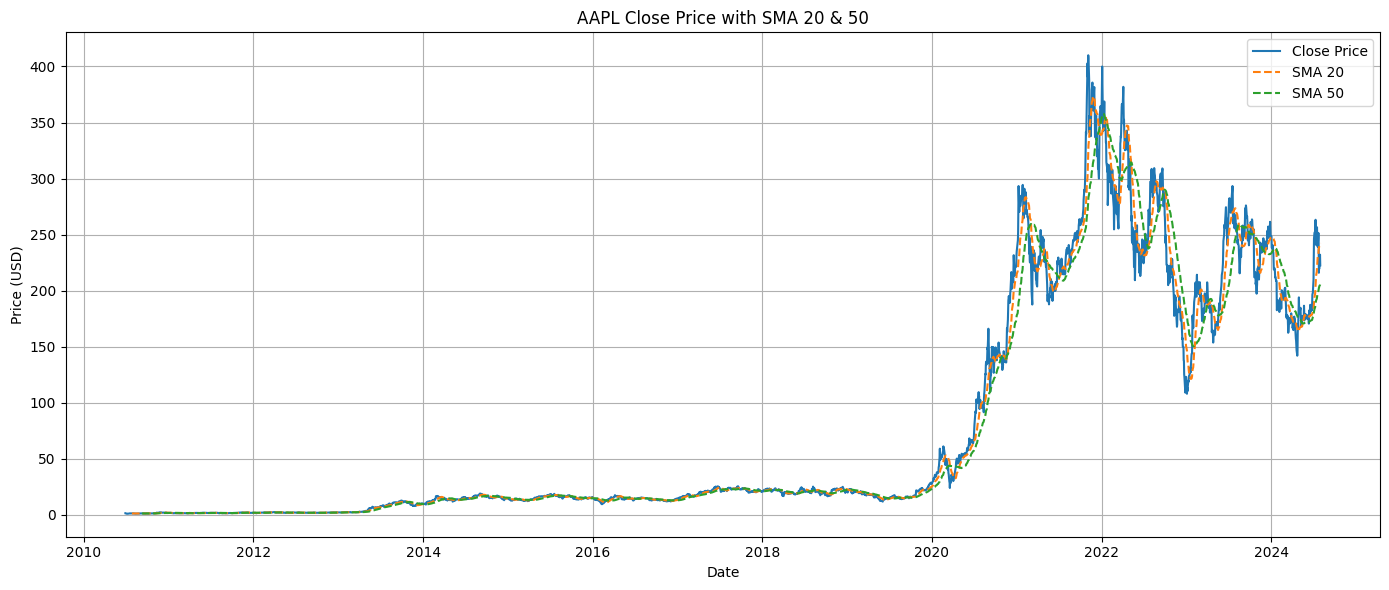

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df_aapl_indicators['Close'], label='Close Price', linewidth=1.5)
plt.plot(df_aapl_indicators['SMA_20'], label='SMA 20', linestyle='--')
plt.plot(df_aapl_indicators['SMA_50'], label='SMA 50', linestyle='--')
plt.title("AAPL Close Price with SMA 20 & 50")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Plot RSI

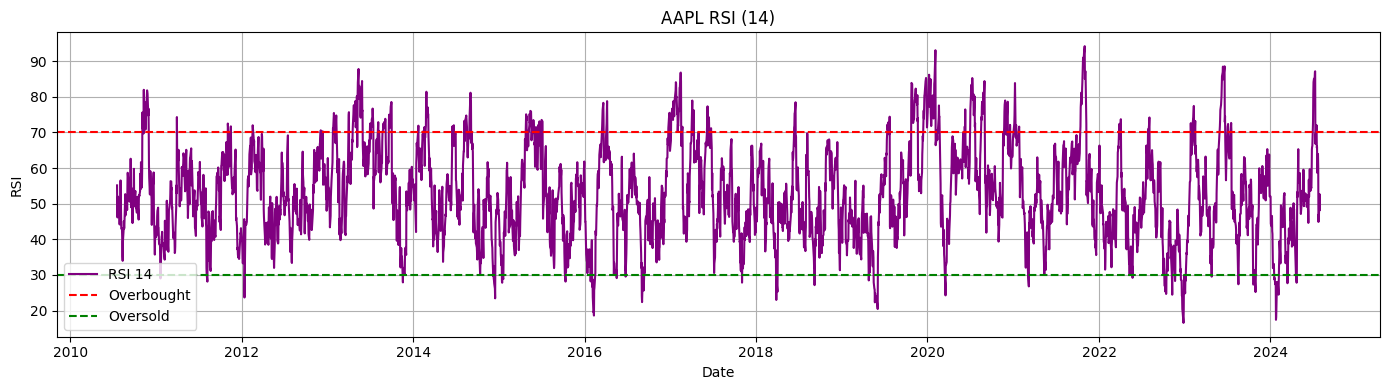

In [ ]:
plt.figure(figsize=(14, 4))
plt.plot(df_aapl_indicators['RSI_14'], color='purple', label='RSI 14')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title("AAPL RSI (14)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Plot MACD and Signal Line

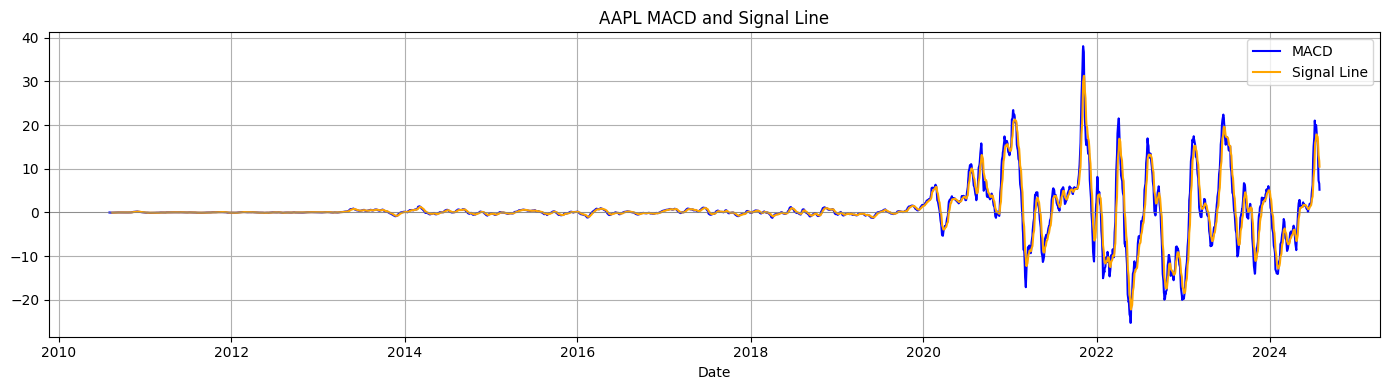

In [ ]:
plt.figure(figsize=(14, 4))
plt.plot(df_aapl_indicators['MACD'], label='MACD', color='blue')
plt.plot(df_aapl_indicators['MACD_signal'], label='Signal Line', color='orange')
plt.axhline(0, color='gray', linewidth=0.5)
plt.title("AAPL MACD and Signal Line")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
